In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import joblib
import matplotlib.pyplot as plt

# Loading the dataset
data = pd.read_csv('cleaned_median.csv', nrows=100000)
# Dropping unnecessary columns

data = data.drop(columns=['User_ID'])

# Separating features and target variable(Purchase)
X = data.drop(columns=['Purchase'])
y = data['Purchase']

# One-Hot Encoding for categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [2]:
# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [3]:
# Initialising KNN Regressor and performing hyperparameter tuning
param_dist = {'n_neighbors': [3, 5, 7, 9]}  # Testing fewer n_neighbors
grid_search = GridSearchCV(KNeighborsRegressor(), param_dist, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [3, 5, 7, 9]},
             scoring='neg_mean_squared_error')

In [4]:
# Best model
best_model = grid_search.best_estimator_

In [5]:
# Making predictions on the test set
y_pred = best_model.predict(X_test_scaled)

In [6]:
# Evaluating the model's performance
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r_squared = best_model.score(X_test_scaled, y_test)

In [7]:
# Print evaluation results
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r_squared}")

# Saving the trained model for future use
joblib.dump(best_model, 'knn_sales_prediction_model.pkl') 

Best Parameters: {'n_neighbors': 9}
Mean Absolute Error (MAE): 2168.6553055555555
Root Mean Squared Error (RMSE): 2933.381807623358
R-squared: 0.6546533852252681


['knn_sales_prediction_model.pkl']

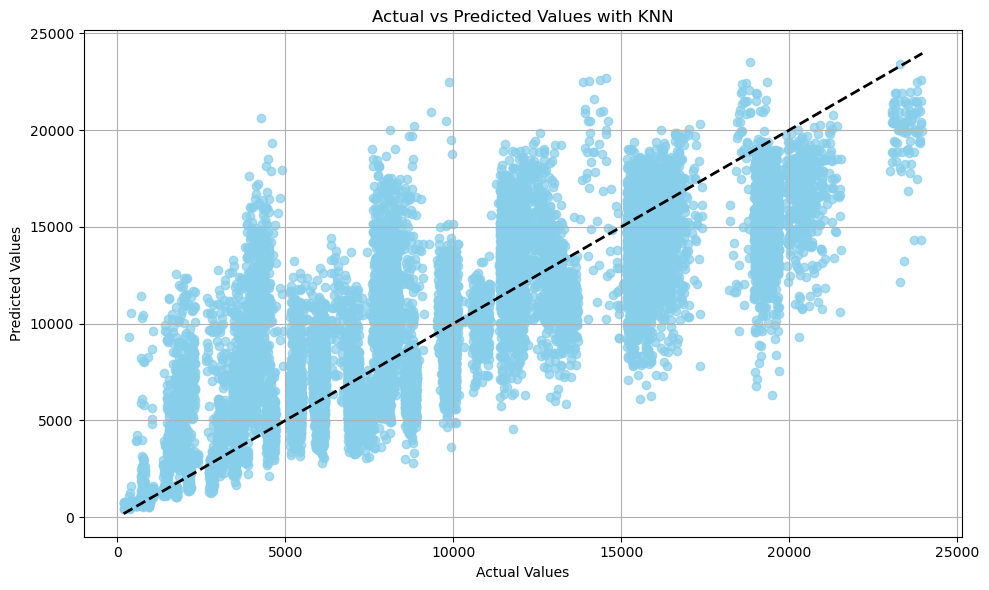

In [8]:
# Visualising the predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='skyblue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values with KNN')
plt.grid(True)
plt.tight_layout()
plt.show()

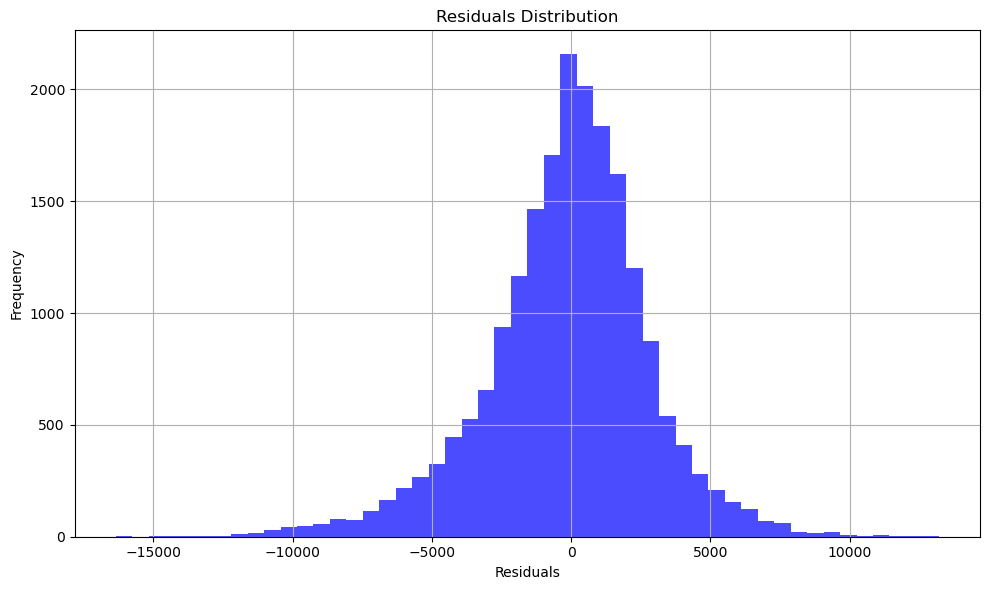

In [9]:
# Visualising the residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=50, color='blue', alpha=0.7)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()
